In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_csv('D:/INSTALLED_APP/AI/Dataset/advance_house_price/train.csv')
df_test = pd.read_csv('D:/INSTALLED_APP/AI/Dataset/advance_house_price/test.csv')

In [3]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
# Separate the dependent column

y = df_train.pop('SalePrice')
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
df_train.shape, df_test.shape

((1460, 80), (1459, 80))

In [6]:
df = pd.concat([df_train, df_test], axis=0)

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.shape

(2919, 79)

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


***
## <font color='red'>Check for Correlation</font>

<AxesSubplot:>

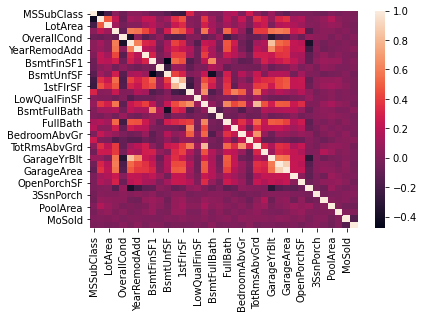

In [110]:
sns.heatmap(df.corr())

In [111]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028
LotFrontage,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917
LotArea,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
OverallQual,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614
OverallCond,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102
YearBuilt,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510
BsmtFinSF1,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556
BsmtFinSF2,-0.072530,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,-0.238241,0.089410,0.084330,-0.097744,-0.004923,-0.017872,0.162835,0.099485,-0.075432,-0.032448,-0.031223,-0.037779,-0.048423,0.065625,-0.068549,-0.014827,0.003139,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883


In [113]:
print(df.corr().index)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [122]:
def correlation(dataframe, threshold):
    '''This function finds all the column which have correlation above threshold and return a list of names of all those column'''
    col_corr = set() #set of all the names of deleted colums
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold and corr_matrix.columns[j] not in col_corr:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [123]:
correlation.__doc__

'This function finds all the column which have correlation above threshold and return a list of names of all those column'

In [127]:
corr_list = list(correlation(df, 0.8))
corr_list

['TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', '1stFlrSF']

In [128]:
df.shape

(2919, 79)

In [129]:
df.drop(corr_list, axis=1, inplace=True)

In [130]:
df.shape

(2919, 75)

***
## <font color='red'>Separating Numerical columns & Categorical Columns</font>

In [10]:
category_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [11]:
df_category = df[category_features].copy()
df_numerical = df[numerical_features].copy()

In [12]:
df_category.shape, df_numerical.shape

((2919, 43), (2919, 36))

***
## <font color='red'>Handling Missing Value</font>

### <font color='green'>Categorical Column</font>

<AxesSubplot:>

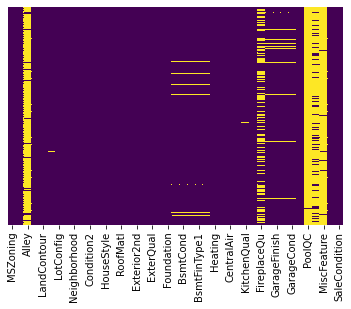

In [13]:
sns.heatmap(df_category.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
for items in category_features:
    if df_category[items].isnull().mean() * 100 > 80:
        print(items)
        df_category.drop(items, axis=1, inplace=True)

Alley
PoolQC
Fence
MiscFeature


In [15]:
df_category.shape

(2919, 39)

<AxesSubplot:>

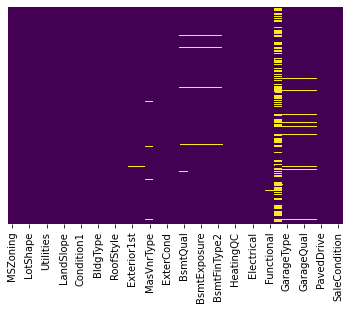

In [16]:
sns.heatmap(df_category.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

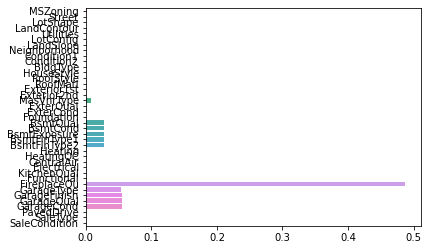

In [17]:
sns.barplot(y=df_category.columns, x=df_category.isnull().mean())

In [18]:
df_category.isnull().mean()*100

MSZoning          0.137033
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinType2      2.740665
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.034258
KitchenQual       0.034258
Functional        0.068517
FireplaceQu      48.646797
GarageType        5.378554
GarageFinish      5.447071
GarageQual        5.447071
GarageCond        5.447071
PavedDrive        0.000000
S

In [19]:
# Function to fill all the category NaN value using Missing

def fill_category_nan(dataframe, columns):
    for feature in columns:
        if dataframe[feature].isnull().sum() > 0:
            dataframe[feature] = dataframe[feature].fillna(feature + '_Missing')

In [20]:
# fill FireplaceQu with Missing as it has 48% of data missing
fill_category_nan(df_category, ['FireplaceQu'])

In [21]:
def fill_with_Missing(dataframe, colomns):
    for feature in columns:
        dataframe[feature] = dataframe[feature].fillna(df_category[feature].mode()[0])

In [22]:
# fill all category NaN with Missing

category_features = df_category.columns

fill_category_nan(df_category, category_features)

<AxesSubplot:>

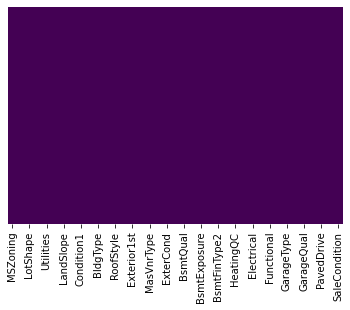

In [23]:
sns.heatmap(df_category.isnull(), yticklabels=False, cbar=False, cmap='viridis')

All the missing categorical data are handled

### <font color='green'>Numerical Columns</font>

<AxesSubplot:>

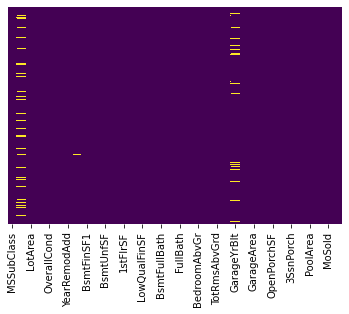

In [24]:
sns.heatmap(df_numerical.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
for items in numerical_features:
    if df_numerical[items].isnull().sum() > 0:
        print(f"{items} : {df_numerical[items].isnull().mean() * 100}")

LotFrontage : 16.649537512846866
MasVnrArea : 0.7879410757108599
BsmtFinSF1 : 0.0342583076396026
BsmtFinSF2 : 0.0342583076396026
BsmtUnfSF : 0.0342583076396026
TotalBsmtSF : 0.0342583076396026
BsmtFullBath : 0.0685166152792052
BsmtHalfBath : 0.0685166152792052
GarageYrBlt : 5.4470709146968135
GarageCars : 0.0342583076396026
GarageArea : 0.0342583076396026


In [26]:
def fill_numerical_nan(dataframe, columns):
    for variable in columns:
        if dataframe[variable].isnull().sum() > 0:
            random_sample = dataframe[variable].dropna().sample(dataframe[variable].isnull().sum(), random_state=0)

            # pandas need to have same index in order to merge the dataset
            random_sample.index= dataframe[dataframe[variable].isnull()].index

            # using loc we are replacing with random sample whenever it finds null
            dataframe.loc[df[variable].isnull(), variable] = random_sample

In [27]:
# Call function to fill numerical NaN value
fill_numerical_nan(df_numerical, numerical_features)

<AxesSubplot:>

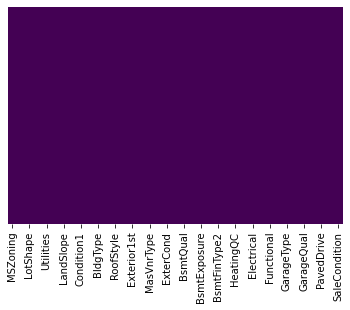

In [28]:
sns.heatmap(df_category.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


***
# <font color='red'>Temporal Variable</font>

In [30]:
# Handle temporary variables

temp_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for feature in temp_cols:
    df_numerical[feature] = 2020 - df_numerical[feature]

In [31]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,17,17,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,17.0,2.0,548.0,0,61,0,0,0,0,0,2,12
1,20,80.0,9600,6,8,44,44,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,44.0,2.0,460.0,298,0,0,0,0,0,0,5,13
2,60,68.0,11250,7,5,19,18,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,19.0,2.0,608.0,0,42,0,0,0,0,0,9,12
3,70,60.0,9550,7,5,105,50,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,22.0,3.0,642.0,0,35,272,0,0,0,0,2,14
4,60,84.0,14260,8,5,20,20,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,20.0,3.0,836.0,192,84,0,0,0,0,0,12,12


***
# <font color='red'>Transformation</font>

In [32]:
import scipy.stats as stats
import pylab

# If we want to check whether feature is gaussian or normal distributed then we can use Q-Q plot
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

In [41]:
def plot_graph(df, feature, transformation):
    plt.figure(figsize=(6, 4))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(transformation)
    plt.title(feature)
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

def apply_transformation(data, column):
    # Copying the dataset so that our main data doesn't hamper
    dataframe = data.copy()
    
    plot_graph(dataframe, column, 'original')
    
    # LogTrasformation
    dataframe[column+'_log']= np.log(dataframe[column])
    plot_graph(dataframe, column+'_log', "log")
    
    # Reciprocal Transformation
    dataframe[column+'_reciprocal'] = 1/dataframe[column]
    plot_graph(dataframe, column+'_reciprocal', "reciprocal")
    
    # Square Transformation
    dataframe[feature+'_square'] = dataframe[feature]**(1/2)
    plot_graph(dataframe, feature+'_square', "Square")
    
    # Box Cox Transforamtion
    dataframe[feature+'_Boxcox'], parameter = stats.boxcox(dataframe[feature])
    plot_graph(dataframe, feature+'_Boxcox', "BoxCox")

    # dataframe.head()
    

In [85]:
def log_transform(dataframe, feature):
    dataframe[feature] = np.log(dataframe[feature])
    
def reciprocal_transform(dataframe, feature):
    dataframe[feature] = 1/dataframe[feature]


In [34]:
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [71]:
# 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', '1stFlrSF'

log = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'GrLivArea'] # 'TotRmsAbvGrd', , '1stFlrSF' these2 ar removesd as it has more correlation
reciprocal = ['OverallQual', 'OverallCond']
has_zeros = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
             'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea',
            'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal']

In [82]:
# This show that all those column in has_zeros has lots of 0. Therefore these can't be transformed

df_numerical[has_zeros].head()

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,196.0,706.0,0.0,150.0,856.0,854,0,1.0,0.0,2,1,3,1,0,2.0,548.0,0,61,0,0,0,0,0
1,0.0,978.0,0.0,284.0,1262.0,0,0,0.0,1.0,2,0,3,1,1,2.0,460.0,298,0,0,0,0,0,0
2,162.0,486.0,0.0,434.0,920.0,866,0,1.0,0.0,2,1,3,1,1,2.0,608.0,0,42,0,0,0,0,0
3,0.0,216.0,0.0,540.0,756.0,756,0,1.0,0.0,1,0,3,1,1,3.0,642.0,0,35,272,0,0,0,0
4,350.0,655.0,0.0,490.0,1145.0,1053,0,1.0,0.0,2,1,4,1,1,3.0,836.0,192,84,0,0,0,0,0


In [83]:
for item in has_zeros:
    print(item, len(df_numerical)-np.count_nonzero(df_numerical[item]) end=' | ')

MasVnrArea 1756
BsmtFinSF1 929
BsmtFinSF2 2572
BsmtUnfSF 241
TotalBsmtSF 78
2ndFlrSF 1668
LowQualFinSF 2879
BsmtFullBath 1707
BsmtHalfBath 2744
FullBath 12
HalfBath 1834
BedroomAbvGr 8
KitchenAbvGr 3
Fireplaces 1420
GarageCars 157
GarageArea 157
WoodDeckSF 1523
OpenPorchSF 1298
EnclosedPorch 2460
3SsnPorch 2882
ScreenPorch 2663
PoolArea 2906
MiscVal 2816


**Checking which transformation will suit the most**

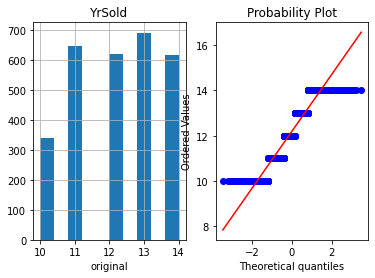

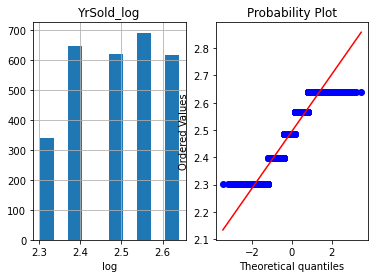

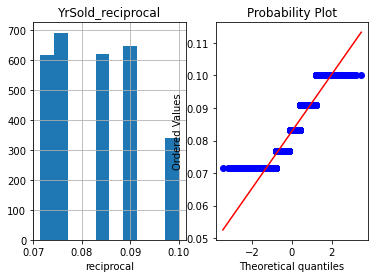

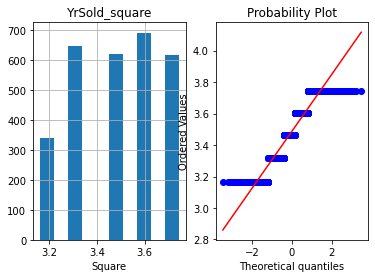

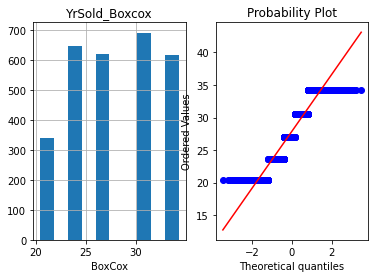

In [70]:
apply_transformation(df_numerical, 'YrSold')

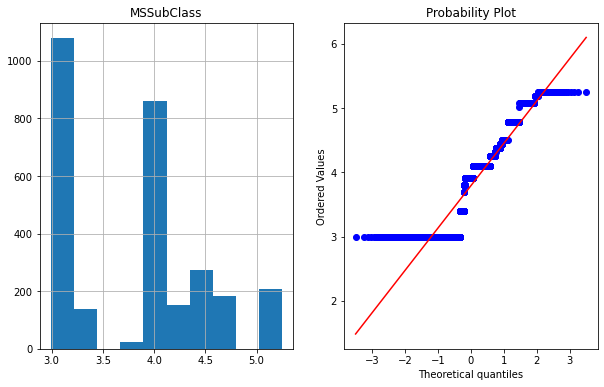

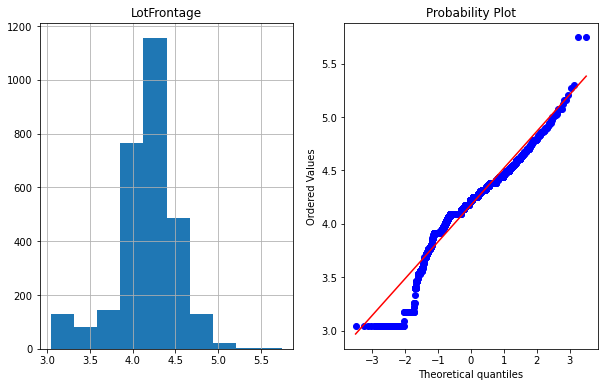

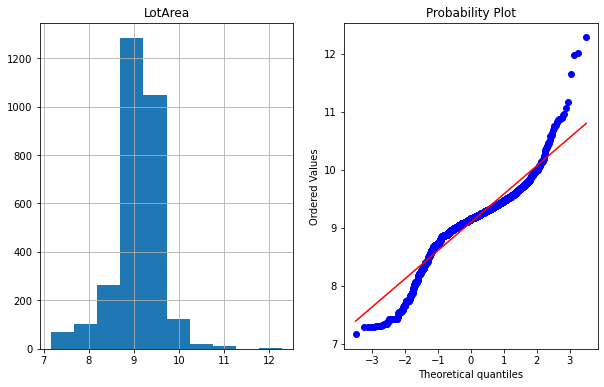

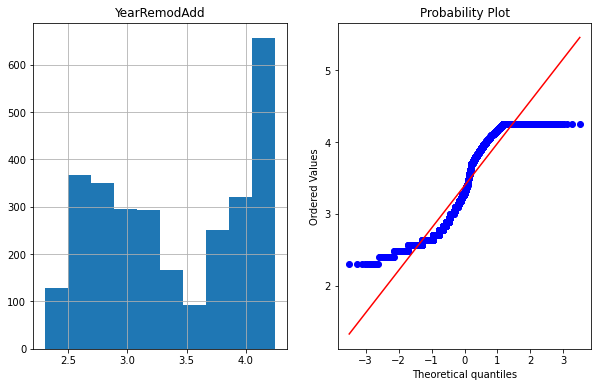

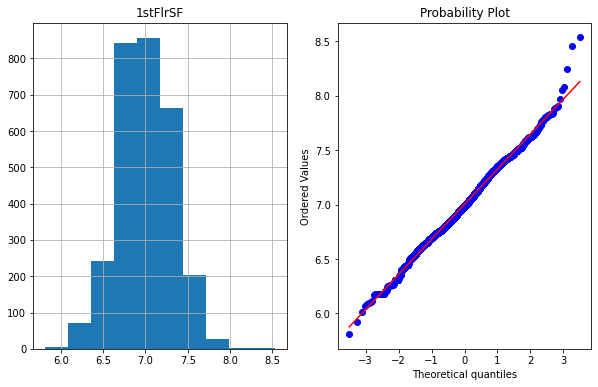

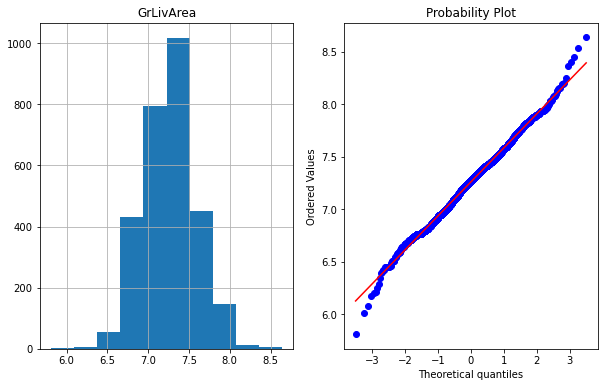

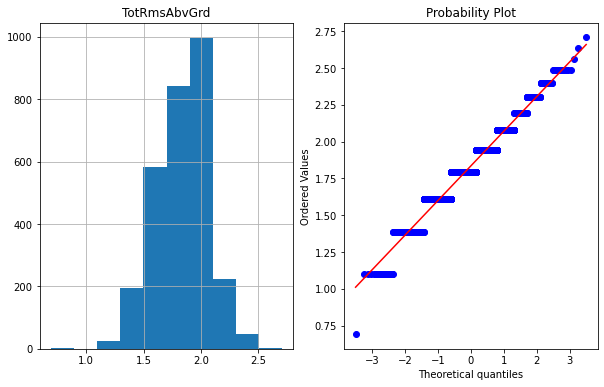

In [84]:
# Aplly log transformation to all the possible 
for item in log:
    log_transform(df_numerical, item)

In [86]:
# Aplly reciprocal transformation to all the possible 
for item in reciprocal:
    reciprocal_transform(df_numerical, item)

In [87]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.094345,4.174387,9.041922,0.142857,0.200,17,2.833213,196.0,706.0,0.0,150.0,856.0,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,2.079442,0,17.0,2.0,548.0,0,61,0,0,0,0,0,2,12
1,2.995732,4.382027,9.169518,0.166667,0.125,44,3.784190,0.0,978.0,0.0,284.0,1262.0,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,1.791759,1,44.0,2.0,460.0,298,0,0,0,0,0,0,5,13
2,4.094345,4.219508,9.328123,0.142857,0.200,19,2.890372,162.0,486.0,0.0,434.0,920.0,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,1.791759,1,19.0,2.0,608.0,0,42,0,0,0,0,0,9,12
3,4.248495,4.094345,9.164296,0.142857,0.200,105,3.912023,0.0,216.0,0.0,540.0,756.0,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,1.945910,1,22.0,3.0,642.0,0,35,272,0,0,0,0,2,14
4,4.094345,4.430817,9.565214,0.125000,0.200,20,2.995732,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,2.197225,1,20.0,3.0,836.0,192,84,0,0,0,0,0,12,12


***
## <font color='red'>Handling Outliers</font>

In [88]:
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


<AxesSubplot:xlabel='LotArea'>

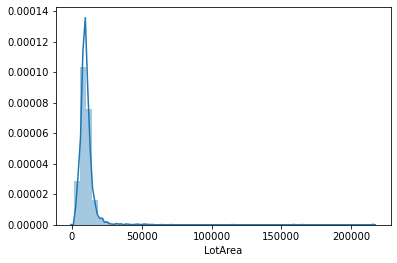

In [51]:
sns.distplot(df_numerical.LotArea)

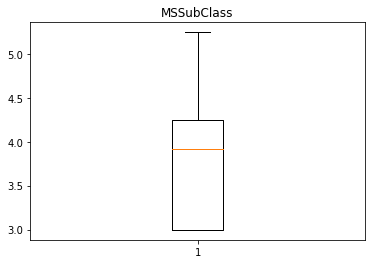

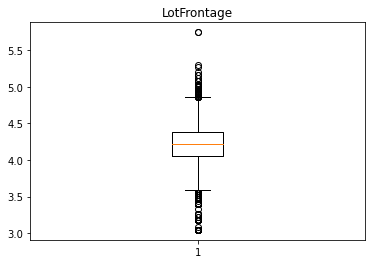

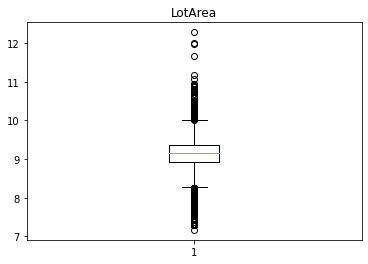

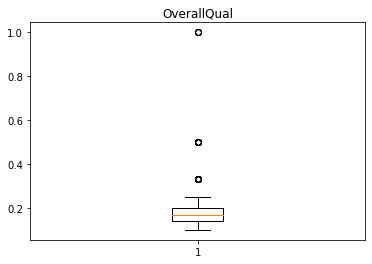

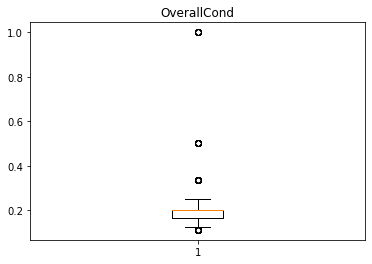

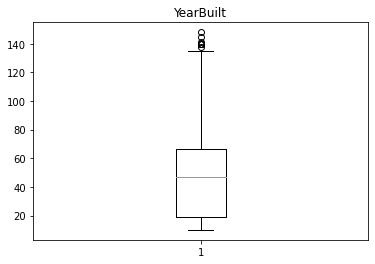

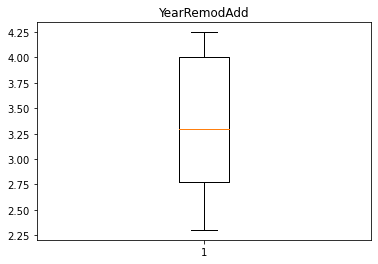

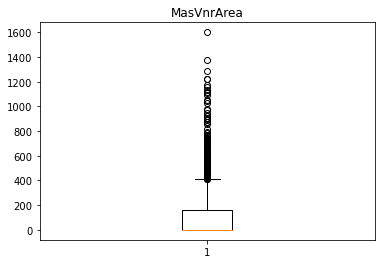

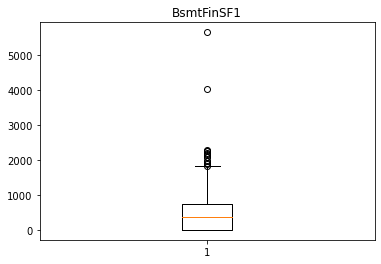

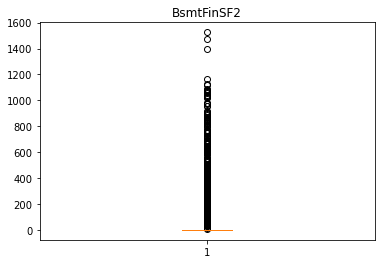

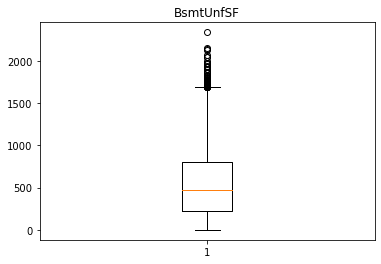

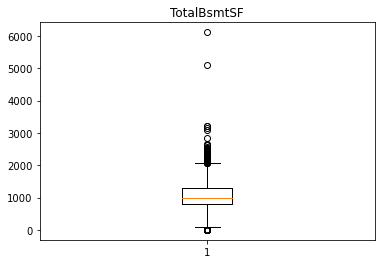

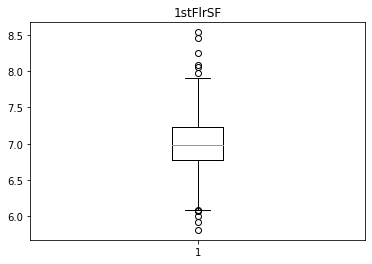

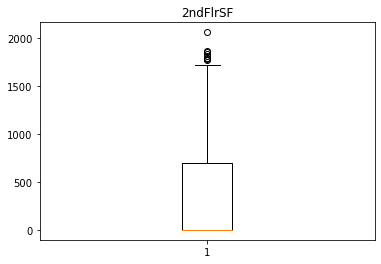

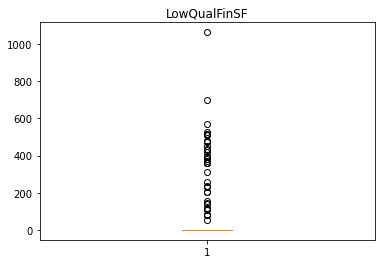

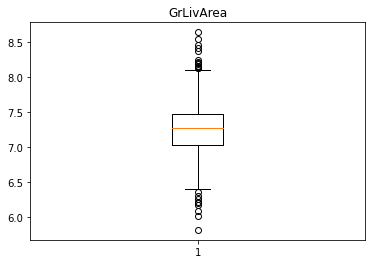

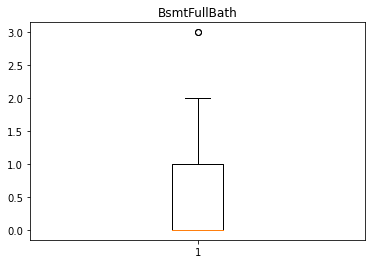

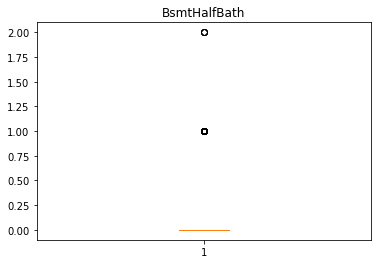

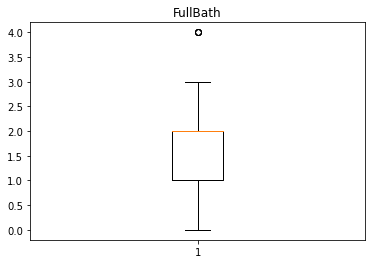

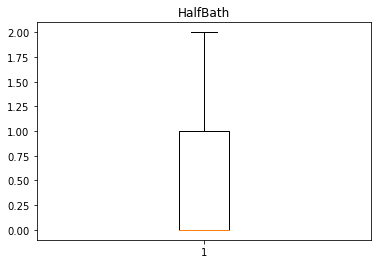

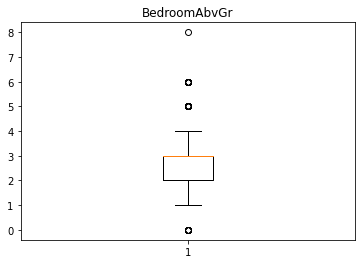

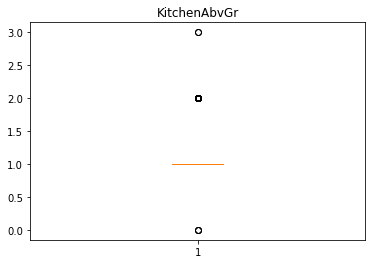

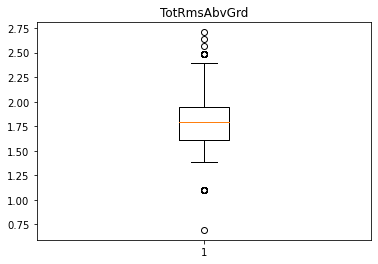

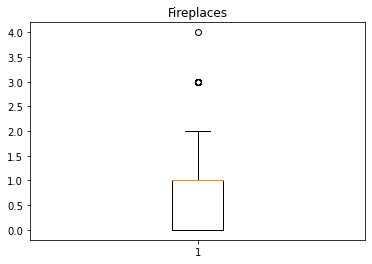

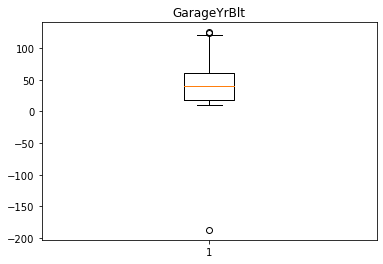

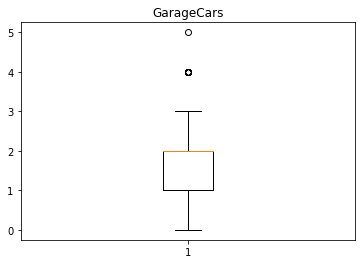

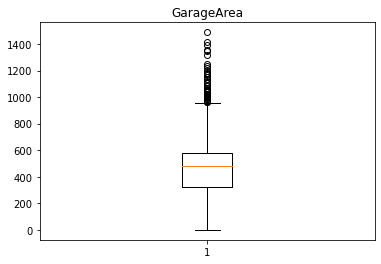

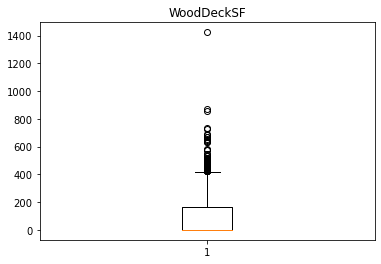

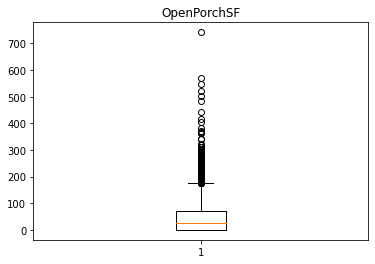

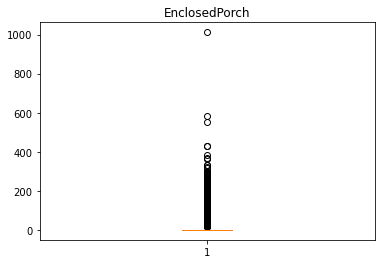

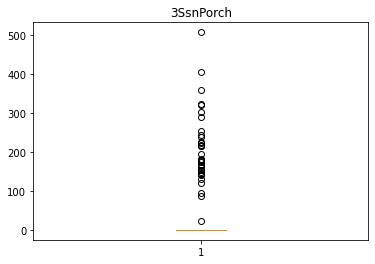

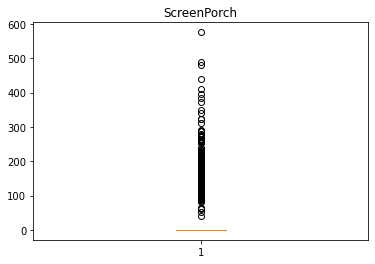

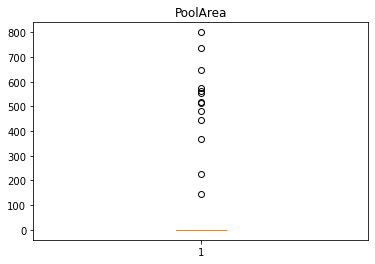

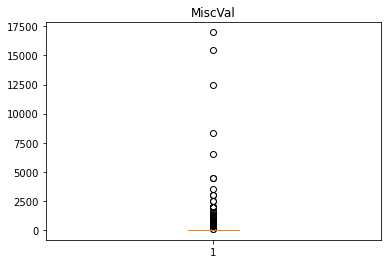

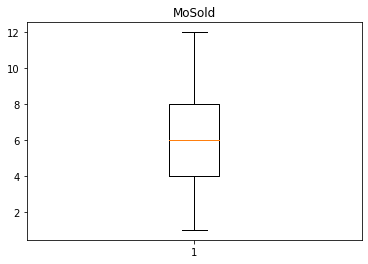

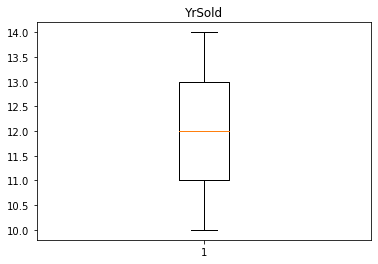

In [89]:
for item in df_numerical.columns:
    plt.boxplot(df_numerical[item])
    plt.title(item)
    plt.show()

In [91]:
def handle_outlier(dataframe, col):
    upper_bound = dataframe[col].mean() + 3* dataframe[col].std()
    lower_bound = dataframe[col].mean() - 3* dataframe[col].std()
    dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound, dataframe[col])
    dataframe[col] = np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col])

In [92]:
for item in df_numerical.columns:
    handle_outlier(df_numerical, item)

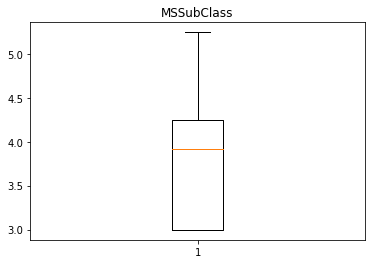

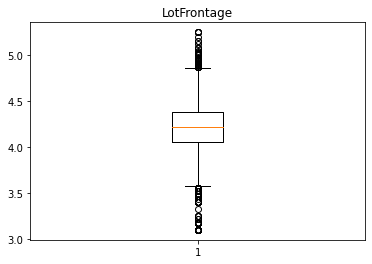

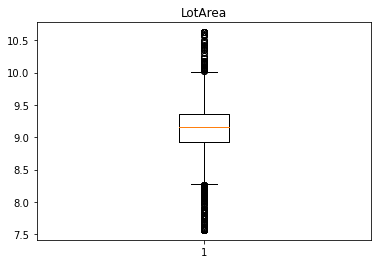

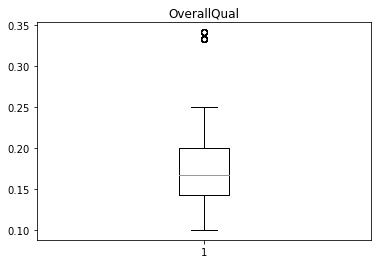

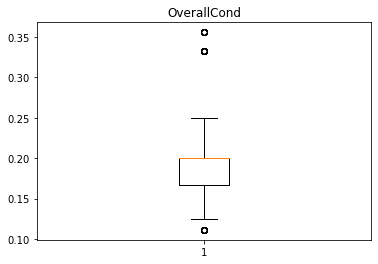

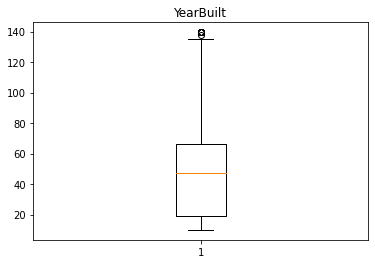

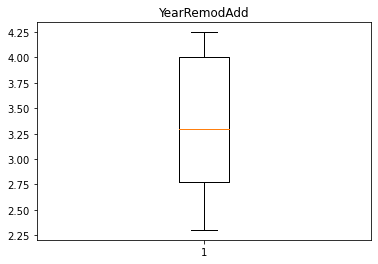

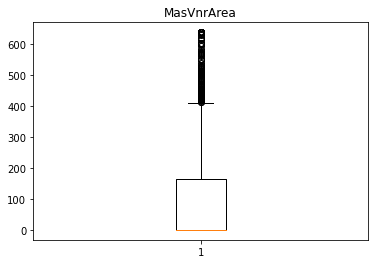

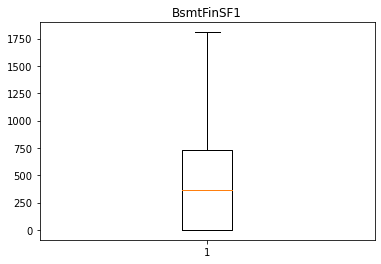

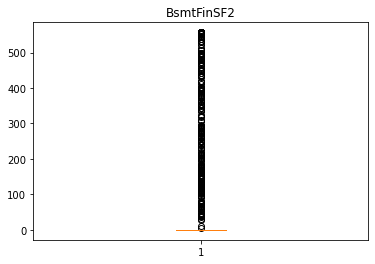

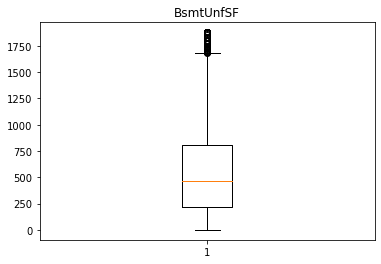

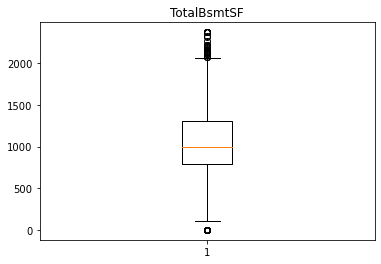

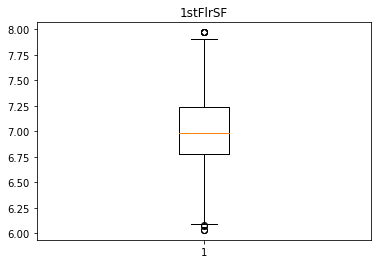

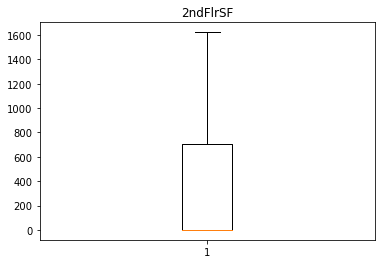

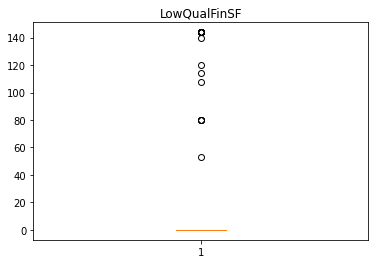

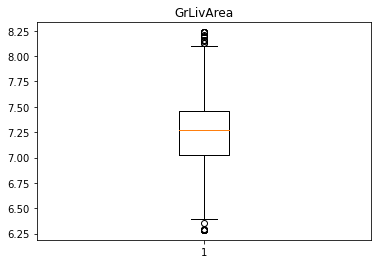

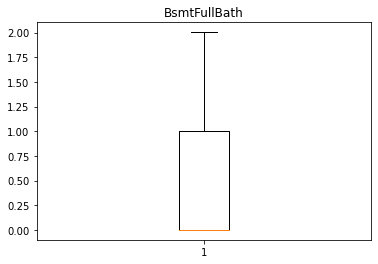

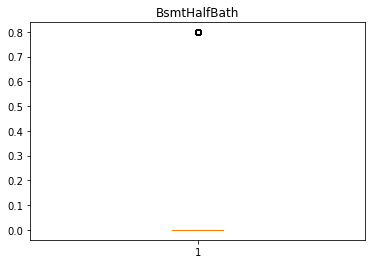

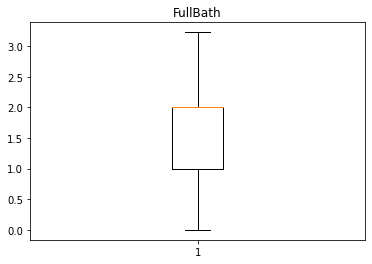

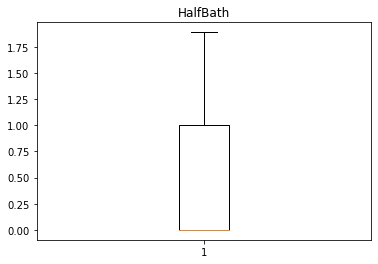

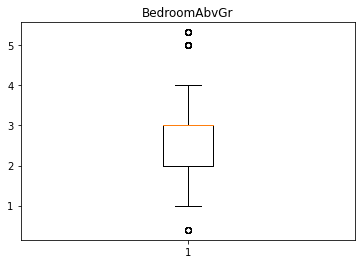

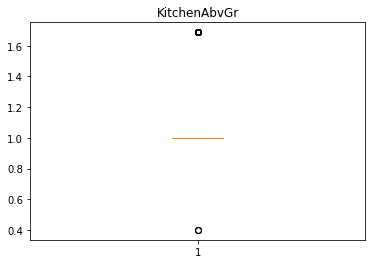

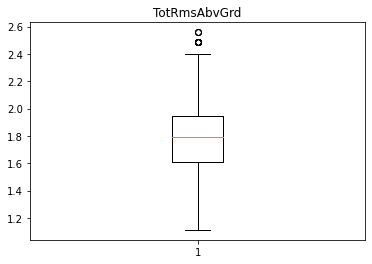

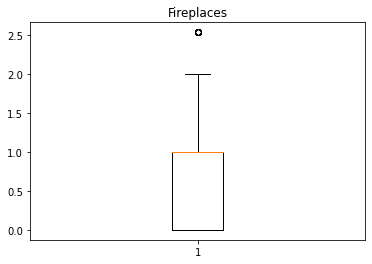

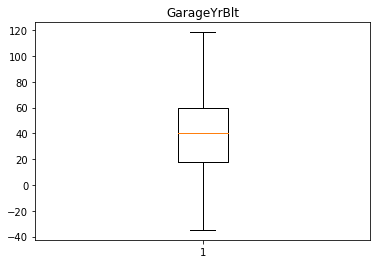

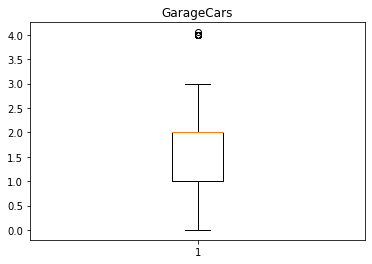

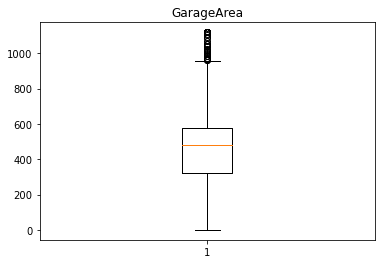

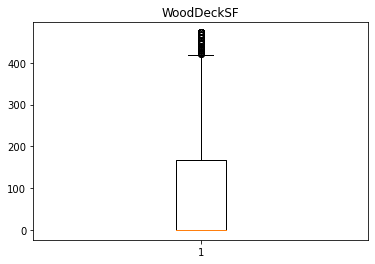

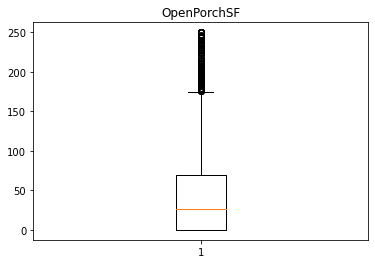

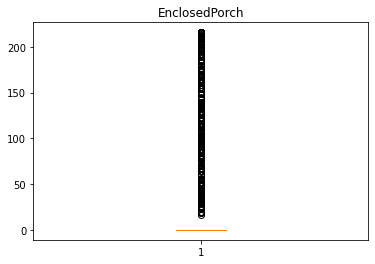

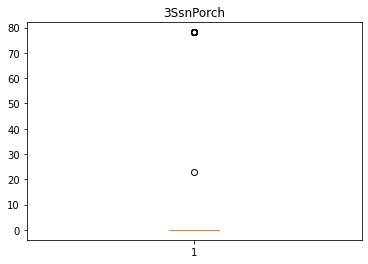

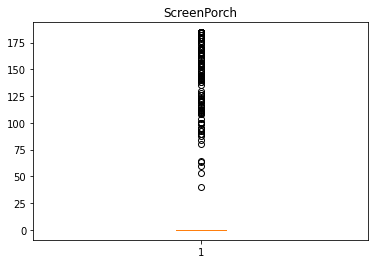

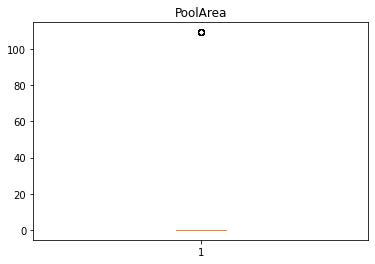

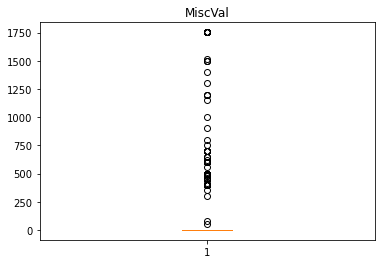

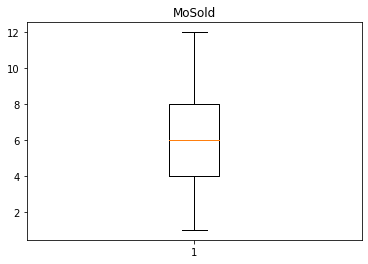

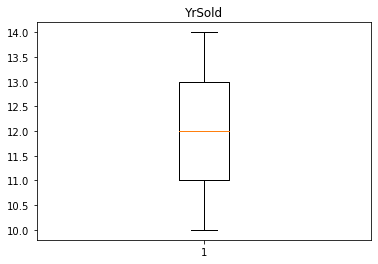

In [93]:
for item in df_numerical.columns:
    plt.boxplot(df_numerical[item])
    plt.title(item)
    plt.show()

In [24]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.000000,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.000000,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,0.798146,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.000000,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.000000,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.000000,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,215.831058,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.000000,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.000000,0.0,0.0,0.0,0.0,12.0,2008.0


***
# <font color='red'>One Hot Encoding</font>

In [94]:
large_features = [feature for feature in df_category.columns if len(df_category[feature].unique()) >= 8]
large_features

['Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'SaleType']

In [95]:
# Encode Categories with more then 7 features

def one_hot_encode(data, column):
    features = data[column].value_counts().head(7).index
    for cat in features:
        data[column + '_' +cat] = np.where(data[column] == cat, 1, 0)
    data.drop(column, axis=1, inplace=True)

In [96]:
for item in large_features:
    one_hot_encode(df_category, item)

In [97]:
df_category.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleCondition,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosN,Condition2_PosA,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Functional_Missing,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,FireplaceQu_Missing,Attchd,RFn,TA,TA,Y,Normal,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,1Fam,Gable,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,TA,Y,Normal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,Gable,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,Normal,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,Gable,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,TA,Y,Abnorml,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,1Fam,Gable,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,Normal,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [98]:
df_category.shape

(2919, 93)

In [132]:
for item in df_category.columns:
    if len(df_category[item].unique()) > 2:
        print(f"{item} : {len(df_category[item].unique())}")

In [100]:
s = pd.get_dummies(df_category, drop_first=True)
s.head()

,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosN,Condition2_PosA,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Functional_Missing,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,

In [101]:
df_category = s
df_category.head()

,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosN,Condition2_PosA,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Functional_Missing,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,

In [102]:
df_category.shape, df_numerical.shape

((2919, 182), (2919, 36))

In [103]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.094345,4.174387,9.041922,0.142857,0.200,17.0,2.833213,196.0,706.0,0.0,150.0,856.0,6.752270,854.0,0.0,7.444249,1.0,0.000000,2.0,1.0,3.0,1.0,2.079442,0.0,17.0,2.0,548.0,0.0,61.0,0.000000,0.0,0.0,0.0,0.0,2.0,12.0
1,2.995732,4.382027,9.169518,0.166667,0.125,44.0,3.784190,0.0,978.0,0.0,284.0,1262.0,7.140453,0.0,0.0,7.140453,0.0,0.798146,2.0,0.0,3.0,1.0,1.791759,1.0,44.0,2.0,460.0,298.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0,13.0
2,4.094345,4.219508,9.328123,0.142857,0.200,19.0,2.890372,162.0,486.0,0.0,434.0,920.0,6.824374,866.0,0.0,7.487734,1.0,0.000000,2.0,1.0,3.0,1.0,1.791759,1.0,19.0,2.0,608.0,0.0,42.0,0.000000,0.0,0.0,0.0,0.0,9.0,12.0
3,4.248495,4.094345,9.164296,0.142857,0.200,105.0,3.912023,0.0,216.0,0.0,540.0,756.0,6.867974,756.0,0.0,7.448334,1.0,0.000000,1.0,0.0,3.0,1.0,1.945910,1.0,22.0,3.0,642.0,0.0,35.0,215.831058,0.0,0.0,0.0,0.0,2.0,14.0
4,4.094345,4.430817,9.565214,0.125000,0.200,20.0,2.995732,350.0,655.0,0.0,490.0,1145.0,7.043160,1053.0,0.0,7.695303,1.0,0.000000,2.0,1.0,4.0,1.0,2.197225,1.0,20.0,3.0,836.0,192.0,84.0,0.000000,0.0,0.0,0.0,0.0,12.0,12.0


#### <font color='green'>Concat Numerical & Categorical dataframe</font>

In [40]:
df_category.reset_index(drop=True, inplace=True)
df_numerical.reset_index(drop=True, inplace=True)
data = pd.concat([df_numerical, df_category], axis=1)

In [41]:
df_category.shape, df_numerical.shape

((2919, 195), (2919, 36))

In [42]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosN,Condition2_PosA,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Metal,RoofMatl_Membran,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-

In [152]:
data.shape

(2919, 218)

***
# <font color='red'>Separate Train & Test dataset from the single dataset</font>

In [153]:
train = data.loc[:1459, :]
test = data.loc[1460:, :]

In [154]:
train.shape, test.shape

((1460, 218), (1459, 218))

***
# <font color='red'>Feature Selection</font>
We'll use Lasso Regression to select best Features

In [140]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [144]:
np.linspace(start=0.0001, stop=1, num=10)

array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00])

In [160]:
# Using Cross validation lets calculate which alpha value is best


xgb_model = XGBRegressor()

accuracy = dict() # add all the accuracy here

for i in np.linspace(start=1, stop=20, num=40):
    feature_sel_model = SelectFromModel(Lasso(alpha=i, random_state=0))
    feature_sel_model.fit(train, y)
    selected_feature = train.columns[(feature_sel_model.get_support())]
    
    x = train[train.columns[(feature_sel_model.get_support())]]
    
    val = cross_val_score(xgb_model, x, y, cv=5)
    accuracy[i] = (val.mean()*100)

C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394362365847.10547, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(
C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392885331074.3073, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(
C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350950037115.9833, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(
C:\Users\arunn\AppData\Roaming\Python\Python38\site-pa

In [161]:
# Show accuracy for all the alpha value considered

accuracy

{1.0: 85.91796098655367,
 1.4871794871794872: 85.7542144431339,
 1.9743589743589745: 85.99326587221074,
 2.4615384615384617: 86.06503564894177,
 2.948717948717949: 86.15204468947348,
 3.4358974358974357: 86.07607737351512,
 3.923076923076923: 85.95028462603678,
 4.410256410256411: 86.04324527491076,
 4.897435897435898: 86.08257164551591,
 5.384615384615384: 86.02757360461075,
 5.871794871794871: 85.88819921267168,
 6.358974358974359: 85.83861970757447,
 6.846153846153846: 86.01546401063267,
 7.333333333333333: 86.01546401063267,
 7.82051282051282: 85.96382085293601,
 8.307692307692307: 85.82809045199967,
 8.794871794871796: 87.42959721851706,
 9.282051282051281: 87.42959721851706,
 9.769230769230768: 88.0292797857655,
 10.256410256410255: 88.0292797857655,
 10.743589743589743: 88.16282240796465,
 11.23076923076923: 88.03211836454122,
 11.717948717948717: 87.51707391982272,
 12.205128205128204: 87.51707391982272,
 12.692307692307692: 87.51707391982272,
 13.179487179487179: 86.6697237063

In [59]:
# it shows that for  alpha=23 the accuracy is maximum

max(accuracy)

-1.3663189572657002e+19

In [163]:
feature_sel_model = SelectFromModel(Lasso(alpha=10.743589743589743, random_state=0))
feature_sel_model.fit(train, y)
selected_feature = train.columns[(feature_sel_model.get_support())]
    
x = train[train.columns[(feature_sel_model.get_support())]]

In [164]:
print(f"total featue : {train.shape}")
print(f"selected feature : {len(selected_feature)}")
print(f"feature with coefficient shrank to zero : {np.sum(feature_sel_model.estimator_.coef_ == 0)}")

total featue : (1460, 218)
selected feature : 175
feature with coefficient shrank to zero : 42


In [165]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Artery,Condition1_RRAn,Condition1_RRAe,Condition1_PosA,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRNn,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Maj1,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,RoofStyle_Gambrel,RoofStyle_Hip,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.094345,4.174387,9.041922,0.142857,0.200,17.0,2.833213,196.0,706.0,0.0,150.0,856.0,6.752270,854.0,0.0,7.444249,1.0,0.000000,2.0,1.0,3.0,1.0,2.079442,0.0,17.0,2.0,548.0,0.0,61.0,0.000000,0.0,0.0,0.0,0.0,2.0,12.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
1,2.995732,4.382027,9.169518,0.166667,0.125,44.0,3.784190,0.0,978.0,0.0,284.0,1262.0,7.140453,0.0,0.0,7.140453,0.0,0.798146,2.0,0.0,3.0,1.0,1.791759,1.0,44.0,2.0,460.0,298.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
2,4.094345,4.219508,9.328123,0.142857,0.200,19.0,2.890372,162.0,486.0,0.0,434.0,920.0,6.824374,866.0,0.0,7.487734,1.0,0.000000,2.0,1.0,3.0,1.0,1.791759,1.0,19.0,2.0,608.0,0.0,42.0,0.000000,0.0,0.0,0.0,0.0,9.0,12.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,

In [167]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [168]:
df_final = pd.concat([x, y], axis=1)

In [169]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Artery,Condition1_RRAn,Condition1_RRAe,Condition1_PosA,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRNn,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Maj1,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,RoofStyle_Gambrel,RoofStyle_Hip,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,4.094345,4.174387,9.041922,0.142857,0.200,17.0,2.833213,196.0,706.0,0.0,150.0,856.0,6.752270,854.0,0.0,7.444249,1.0,0.000000,2.0,1.0,3.0,1.0,2.079442,0.0,17.0,2.0,548.0,0.0,61.0,0.000000,0.0,0.0,0.0,0.0,2.0,12.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,208500
1,2.995732,4.382027,9.169518,0.166667,0.125,44.0,3.784190,0.0,978.0,0.0,284.0,1262.0,7.140453,0.0,0.0,7.140453,0.0,0.798146,2.0,0.0,3.0,1.0,1.791759,1.0,44.0,2.0,460.0,298.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,181500
2,4.094345,4.219508,9.328123,0.142857,0.200,19.0,2.890372,162.0,486.0,0.0,434.0,920.0,6.824374,866.0,0.0,7.487734,1.0,0.000000,2.0,1.0,3.0,1.0,1.791759,1.0,19.0,2.0,608.0,0.0,42.0,0.000000,0.0,0.0,0.0,0.0,9.0,12.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [170]:
df_final.shape

(1460, 176)

In [171]:
df_final.to_csv('train.csv')

In [172]:
df.shape

(2919, 75)

#### Now Put the test data to csv

In [173]:
s = data.iloc[1460:, :]

In [174]:
s.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosN,Condition2_PosA,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Functional_Missing,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,2.995732,4.382027,9.360655,0.200000,0.166667,59.0,4.077537,0.0,468.0,144.0,270.0,882.0,6.797940,0.0,0.0,6.797940,0.0,0.0,1.0,0.0,2.0,1.0,1.609438,0.0,59.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.000000,6.0,10.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,

In [175]:
s.shape

(1459, 218)

In [176]:
s = s[s.columns[(feature_sel_model.get_support())]]

In [177]:
s.shape

(1459, 175)

In [178]:
s.to_csv('test.csv')